In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
electricity = pd.read_excel("Folds5x2_pp.xlsx")
electricity

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [9]:
electricity.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [17]:
electricity_renamed=electricity.rename(columns= {"AT": "Temperature", "V": "Exhaust_Vacum", "AP": "Ambinet_Pressure", "RH": "Relative_Humidity", "PE": "Electricity_Output"})
electricity_renamed

,Temperature,Exhaust_Vacum,Ambinet_Pressure,Relative_Humidity,Electricity_Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [13]:
electricity_renamed.shape

(9568, 5)

In [18]:
electricity_renamed.describe()

,Temperature,Exhaust_Vacum,Ambinet_Pressure,Relative_Humidity,Electricity_Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Text(0.5, 1.0, 'Electricity_Output VS Temperature')

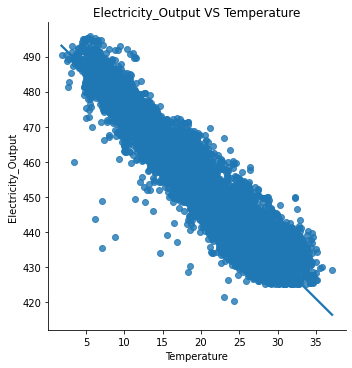

In [19]:
relationship_plot = sns.lmplot(x='Temperature', y ='Electricity_Output', data = electricity_renamed)
plt.title("Electricity_Output VS Temperature")

Text(0.5, 1.0, 'Electricity_Output VS Exhaust_Vacum')

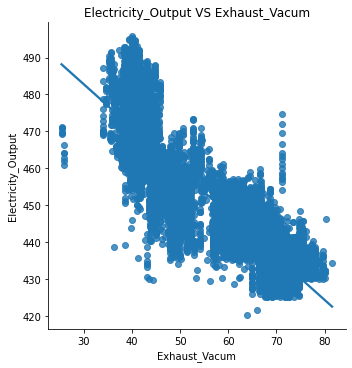

In [20]:
relationship_plot = sns.lmplot(x='Exhaust_Vacum', y ='Electricity_Output', data = electricity_renamed)
plt.title("Electricity_Output VS Exhaust_Vacum")

Text(0.5, 1.0, 'Electricity_Output VS Ambinet_Pressure')

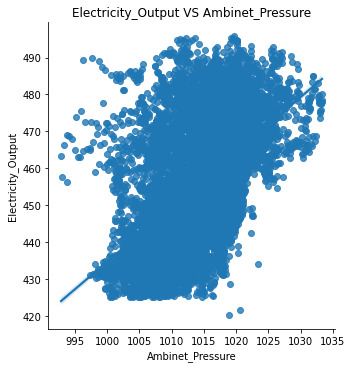

In [21]:
relationship_plot = sns.lmplot(x='Ambinet_Pressure', y ='Electricity_Output', data = electricity_renamed)
plt.title("Electricity_Output VS Ambinet_Pressure")

Text(0.5, 1.0, 'Electricity_Output VS Relative_Humidity')

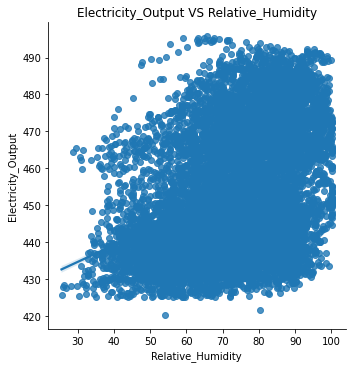

In [22]:
relationship_plot = sns.lmplot(x='Relative_Humidity', y ='Electricity_Output', data = electricity_renamed)
plt.title("Electricity_Output VS Relative_Humidity")

<AxesSubplot:>

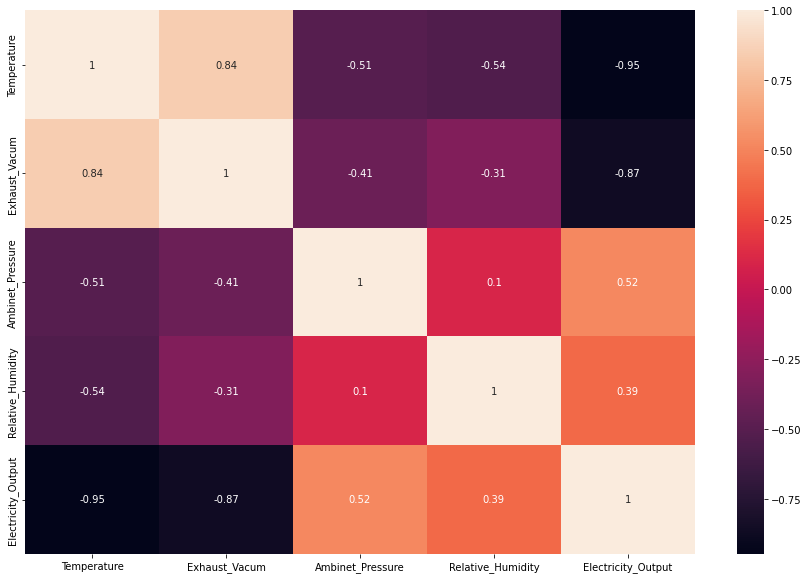

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(electricity_renamed.corr(), annot=True)

In [26]:
y = electricity_renamed['Electricity_Output']
x = electricity_renamed.drop(columns=['Electricity_Output'], axis=1)
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: Electricity_Output, Length: 9568, dtype: float64

In [27]:
x

,Temperature,Exhaust_Vacum,Ambinet_Pressure,Relative_Humidity
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=1)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(random_state=1, max_depth=4)
model.fit(electricity_renamed, x)

RandomForestRegressor(max_depth=4, random_state=1)

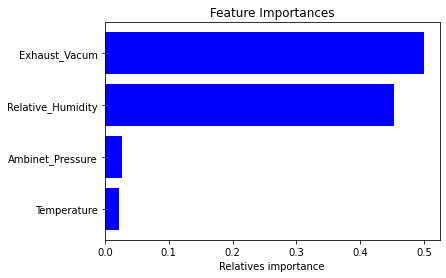

In [34]:
features = electricity_renamed.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-4:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relatives importance')
plt.show()

In [35]:
model = LinearRegression()
power_output = model.fit(X_val, y_val)

In [36]:
coef_deter = power_output.score(X_val, y_val)
coef_deter

0.9260043425552649

In [37]:
intercept = model.coef_
intercept

array([-1.95055325, -0.25198534,  0.04622899, -0.14211512])

In [39]:
y_predict = power_output.predict(X_test)
y_predict

array([438.36393419, 434.31425702, 461.22586168, ..., 443.53943806,
       462.61599393, 432.95903016])

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ", mean_absolute_error(y_test, y_predict))
print("MSE : ", mean_squared_error(y_test, y_predict))
print("R2 score : ", r2_score(y_test, y_predict))

MAE :  3.6024964961104384
MSE :  19.698125660220946
R2 score :  0.9297204669493248


In [44]:
from sklearn.linear_model import Ridge
model_ = Ridge(alpha=5)
power_output_ = model.fit(X_val, y_val)

In [45]:
coef_defer = power_output_.score(X_val, y_val)
coef_defer

0.9260043425552649